<h2>Import All Libraries</h2>

In [1]:
#import all libraries and classes
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

<h2>Import And Inspect The Dataset</h2>

In [2]:
#import the dataset
bankdata = pd.read_csv(r"C:\Users\Williams\Desktop\DataScienceWithAiLead\PROJECT\bank_data.csv")

In [3]:
#inspect the first five records
bankdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#check the dimension of the dataset
bankdata.shape

(41188, 21)

<h2>Data Preparation And Cleaning</h2>

In [5]:
#copy the dataset to another variable
bankdata_df = bankdata.copy()

In [6]:
#check for null columns
bankdata_df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [7]:
#inspect the data types after cleaning
bankdata_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
#check the categories of education
bankdata_df["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', nan, 'university.degree', 'illiterate'],
      dtype=object)

In [9]:
#check and store the most occurring job category grouped by educational level into variables
universitydegree = bankdata_df.groupby("education").get_group("university.degree")["job"].mode()[0]
highschool = bankdata_df.groupby("education").get_group("high.school")["job"].mode()[0]
basic9y = bankdata_df.groupby("education").get_group("basic.9y")["job"].mode()[0]
professionalcourse = bankdata_df.groupby("education").get_group("professional.course")["job"].mode()[0]
basic4y = bankdata_df.groupby("education").get_group("basic.4y")["job"].mode()[0]
basic6y = bankdata_df.groupby("education").get_group("basic.6y")["job"].mode()[0]
illiterate = bankdata_df.groupby("education").get_group("illiterate")["job"].mode()[0]

print(universitydegree)
print(highschool)
print(basic9y)
print(professionalcourse)
print(basic4y)
print(basic6y)
print(illiterate)

admin.
admin.
blue-collar
technician
blue-collar
blue-collar
blue-collar


In [10]:
#fill the null values of each group by its most occurring value
universitydegree = bankdata_df.groupby("education").get_group("university.degree")["job"].fillna(value=universitydegree)
bankdata_df["job"].update(universitydegree)


highschool = bankdata_df.groupby("education").get_group("high.school")["job"].fillna(value=highschool)
bankdata_df["job"].update(highschool)


basic9y = bankdata_df.groupby("education").get_group("basic.9y")["job"].fillna(value=basic9y)
bankdata_df["job"].update(basic9y)


professionalcourse = bankdata_df.groupby("education").get_group("professional.course")["job"].fillna(value=professionalcourse)
bankdata_df["job"].update(professionalcourse)


basic4y = bankdata_df.groupby("education").get_group("basic.4y")["job"].fillna(value=basic4y)
bankdata_df["job"].update(basic4y)



basic6y = bankdata_df.groupby("education").get_group("basic.6y")["job"].fillna(value=basic6y)
bankdata_df["job"].update(basic6y)


illiterate = bankdata_df.groupby("education").get_group("illiterate")["job"].fillna(value=illiterate)
bankdata_df["job"].update(illiterate)


bankdata_df["job"].fillna(value="blue-collar", inplace=True)


bankdata_df["job"].isnull().sum()

0

In [11]:
#check the categories of job
bankdata_df["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [12]:
#check and store the most occurring marital status grouped by job type into variables
admin1 = bankdata_df.groupby("job").get_group("admin.")["marital"].mode()[0]
bluecollar1 = bankdata_df.groupby("job").get_group("blue-collar")["marital"].mode()[0]
technician1 = bankdata_df.groupby("job").get_group("technician")["marital"].mode()[0]
services1 = bankdata_df.groupby("job").get_group("services")["marital"].mode()[0]
management1 = bankdata_df.groupby("job").get_group("management")["marital"].mode()[0]
retired1 = bankdata_df.groupby("job").get_group("retired")["marital"].mode()[0]
entrepreneur1 = bankdata_df.groupby("job").get_group("entrepreneur")["marital"].mode()[0]
selfemployed1 = bankdata_df.groupby("job").get_group("self-employed")["marital"].mode()[0]
housemaid1 = bankdata_df.groupby("job").get_group("housemaid")["marital"].mode()[0]
unemployed1 =  bankdata_df.groupby("job").get_group("unemployed")["marital"].mode()[0]
student1 = bankdata_df.groupby("job").get_group("student")["marital"].mode()[0]

print(admin1)
print(bluecollar1)
print(technician1)
print(services1)
print(management1)
print(retired1)
print(entrepreneur1)
print(selfemployed1)
print(housemaid1)
print(unemployed1)
print(student1)

married
married
married
married
married
married
married
married
married
married
single


In [13]:
#fill the null values of each group by its most occurring value
admin1 = bankdata_df.groupby("job").get_group("admin.")["marital"].fillna(value=admin1)
bankdata_df["marital"].update(admin1)


bluecollar1 = bankdata_df.groupby("job").get_group("blue-collar")["marital"].fillna(value=bluecollar1)
bankdata_df["marital"].update(bluecollar1)


technician1 = bankdata_df.groupby("job").get_group("technician")["marital"].fillna(value=technician1)
bankdata_df["marital"].update(technician1)


services1 = bankdata_df.groupby("job").get_group("services")["marital"].fillna(value=services1)
bankdata_df["marital"].update(services1)


management1 = bankdata_df.groupby("job").get_group("management")["marital"].fillna(value=management1)
bankdata_df["marital"].update(management1)


retired1 = bankdata_df.groupby("job").get_group("retired")["marital"].fillna(value=retired1)
bankdata_df["marital"].update(retired1)


entrepreneur1 = bankdata_df.groupby("job").get_group("entrepreneur")["marital"].fillna(value=entrepreneur1)
bankdata_df["marital"].update(entrepreneur1)



selfemployed1 = bankdata_df.groupby("job").get_group("self-employed")["marital"].fillna(value=selfemployed1)
bankdata_df["marital"].update(selfemployed1)



housemaid1 = bankdata_df.groupby("job").get_group("housemaid")["marital"].fillna(value=housemaid1)
bankdata_df["marital"].update(housemaid1)



unemployed1 = bankdata_df.groupby("job").get_group("unemployed")["marital"].fillna(value=unemployed1)
bankdata_df["marital"].update(unemployed1)


student1 = bankdata_df.groupby("job").get_group("student")["marital"].fillna(value=student1)
bankdata_df["marital"].update(student1)


bankdata_df["marital"].fillna(value="married", inplace=True)


bankdata_df["marital"].isnull().sum()

0

In [14]:
#check the categories of job
bankdata_df["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [15]:
#check and store the most occurring educational level grouped by job category into variables
admin2 = bankdata_df.groupby("job").get_group("admin.")["education"].mode()[0]
bluecollar2 = bankdata_df.groupby("job").get_group("blue-collar")["education"].mode()[0]
technician2 = bankdata_df.groupby("job").get_group("technician")["education"].mode()[0]
services2 = bankdata_df.groupby("job").get_group("services")["education"].mode()[0]
management2 = bankdata_df.groupby("job").get_group("management")["education"].mode()[0]
retired2 = bankdata_df.groupby("job").get_group("retired")["education"].mode()[0]
entrepreneur2 = bankdata_df.groupby("job").get_group("entrepreneur")["education"].mode()[0]
selfemployed2 = bankdata_df.groupby("job").get_group("self-employed")["education"].mode()[0]
housemaid2 = bankdata_df.groupby("job").get_group("housemaid")["education"].mode()[0]
unemployed2 =  bankdata_df.groupby("job").get_group("unemployed")["education"].mode()[0]
student2 = bankdata_df.groupby("job").get_group("student")["education"].mode()[0]

print(admin2)
print(bluecollar2)
print(technician2)
print(services2)
print(management2)
print(retired2)
print(entrepreneur2)
print(selfemployed2)
print(housemaid2)
print(unemployed2)
print(student2)

university.degree
basic.9y
professional.course
high.school
university.degree
basic.4y
university.degree
university.degree
basic.4y
university.degree
high.school


In [16]:
#fill the null values of each group by its most occurring value
admin2 = bankdata_df.groupby("job").get_group("admin.")["education"].fillna(value=admin2)
bankdata_df["education"].update(admin2)


bluecollar2 = bankdata_df.groupby("job").get_group("blue-collar")["education"].fillna(value=bluecollar1)
bankdata_df["education"].update(bluecollar2)


technician2 = bankdata_df.groupby("job").get_group("technician")["education"].fillna(value=technician2)
bankdata_df["education"].update(technician2)


services2 = bankdata_df.groupby("job").get_group("services")["education"].fillna(value=services2)
bankdata_df["education"].update(services2)


management2 = bankdata_df.groupby("job").get_group("management")["education"].fillna(value=management2)
bankdata_df["education"].update(management2)


retired2 = bankdata_df.groupby("job").get_group("retired")["education"].fillna(value=retired2)
bankdata_df["education"].update(retired2)


entrepreneur2 = bankdata_df.groupby("job").get_group("entrepreneur")["education"].fillna(value=entrepreneur2)
bankdata_df["education"].update(entrepreneur2)


selfemployed2 = bankdata_df.groupby("job").get_group("self-employed")["education"].fillna(value=selfemployed2)
bankdata_df["education"].update(selfemployed2)


housemaid2 = bankdata_df.groupby("job").get_group("housemaid")["education"].fillna(value=housemaid2)
bankdata_df["education"].update(housemaid2)



unemployed2 = bankdata_df.groupby("job").get_group("unemployed")["education"].fillna(value=unemployed2)
bankdata_df["education"].update(unemployed2)


student2 = bankdata_df.groupby("job").get_group("student")["education"].fillna(value=student2)
bankdata_df["education"].update(student2)


bankdata_df["education"].fillna(value="university.degree", inplace=True)


bankdata_df["education"].isnull().sum()

0

In [17]:
#check the categories of previous outcome of the campaign
bankdata_df["poutcome"].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [18]:
#check and store the most occurring credit availability category grouped by outcome of previous campaign into variables
nonexistent1 = bankdata_df.groupby("poutcome").get_group("nonexistent")["default"].mode()[0]
failure1 = bankdata_df.groupby("poutcome").get_group("failure")["default"].mode()[0]
success1 = bankdata_df.groupby("poutcome").get_group("success")["default"].mode()[0]

print(nonexistent1)
print(failure1)
print(success1)

no
no
no


In [19]:
#fill the null values of each group by its most occurring value
nonexistent1 = bankdata_df.groupby("poutcome").get_group("nonexistent")["default"].fillna(value=nonexistent1)
bankdata_df["default"].update(nonexistent1)


failure1 = bankdata_df.groupby("poutcome").get_group("failure")["default"].mode().fillna(value=failure1)
bankdata_df["default"].update(failure1)


success1 = bankdata_df.groupby("poutcome").get_group("success")["default"].mode().fillna(value=success1)
bankdata_df["default"].update(success1)


bankdata_df["default"].fillna(value="no", inplace=True)


bankdata_df["default"].isnull().sum()

0

In [20]:
#check and store the most occurring housing loan category grouped by outcome of previous campaign into variables
nonexistent2 = bankdata_df.groupby("poutcome").get_group("nonexistent")["housing"].mode()[0]
failure2 = bankdata_df.groupby("poutcome").get_group("failure")["housing"].mode()[0]
success2 = bankdata_df.groupby("poutcome").get_group("success")["housing"].mode()[0]

print(nonexistent2)
print(failure2)
print(success2)

yes
yes
yes


In [21]:
#fill the null values of each group by its most occurring value
nonexistent2 = bankdata_df.groupby("poutcome").get_group("nonexistent")["housing"].fillna(value=nonexistent2)
bankdata_df["housing"].update(nonexistent2)


failure2 = bankdata_df.groupby("poutcome").get_group("failure")["housing"].mode().fillna(value=failure2)
bankdata_df["housing"].update(failure2)


success2 = bankdata_df.groupby("poutcome").get_group("success")["housing"].mode().fillna(value=success2)
bankdata_df["housing"].update(success2)


bankdata_df["housing"].fillna(value="yes", inplace=True)


bankdata_df["housing"].isnull().sum()

0

In [22]:
#check and store the most occurring personal loan category grouped by outcome of previous campaign into variables
nonexistent3 = bankdata_df.groupby("poutcome").get_group("nonexistent")["loan"].mode()[0]
failure3 = bankdata_df.groupby("poutcome").get_group("failure")["loan"].mode()[0]
success3 = bankdata_df.groupby("poutcome").get_group("success")["loan"].mode()[0]

print(nonexistent3)
print(failure3)
print(success3)

no
no
no


In [23]:
#fill the null values of each group by its most occurring value
nonexistent3 = bankdata_df.groupby("poutcome").get_group("nonexistent")["loan"].fillna(value=nonexistent3)
bankdata_df["loan"].update(nonexistent3)


failure3 = bankdata_df.groupby("poutcome").get_group("failure")["loan"].mode().fillna(value=failure3)
bankdata_df["loan"].update(failure3)


success3 = bankdata_df.groupby("poutcome").get_group("success")["loan"].mode().fillna(value=success3)
bankdata_df["loan"].update(success3)


bankdata_df["loan"].fillna(value="no", inplace=True)


bankdata_df["loan"].isnull().sum()

0

<h4>Inspect The Data After Cleaning</h4>

In [24]:
#inspect the data for null values
bankdata_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [25]:
#inspect the datatypes
bankdata_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [26]:
#inspect all the columns with object datatype
bankdata_df.select_dtypes("object").head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,yes,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


<h2>Data Visualisation</h2>

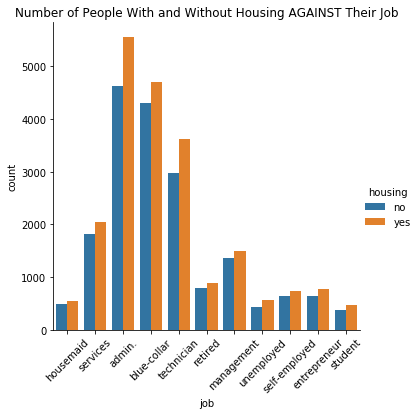

In [27]:
#Visualise "job" and "housing"
sns.catplot(x="job", data=bankdata, hue="housing", kind="count")
plt.title("Number of People With and Without Housing AGAINST Their Job")
plt.xticks(rotation=45)
plt.show()

#The countplot below shows the number of those with and without housing loans in each jobtype.
#It can be seen that the largest number of people on housing loans are found with admin job with approximately 6000 of them
#while the lowest are students of about 500.
#It therefore means that people with admin job will most likely subscribe while students will less likely subscribe.

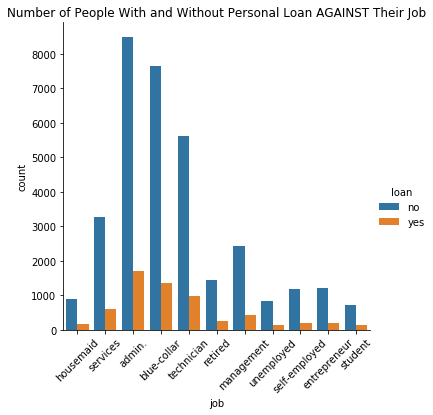

In [28]:
#Visualise "job" and "loan"
sns.catplot(x="job", data=bankdata, hue="loan", kind="count")
plt.title("Number of People With and Without Personal Loan AGAINST Their Job")
plt.xticks(rotation=45)
plt.show()

#The countplot below shows the number of those with and without personal loans in each jobtype.
#It can be seen that the largest number of people on personal loans are found with admin job with approximately 1800 of them
#while the lowest are students of about 180.
#It therefore means that people with admin job will most likely subscribe while students will less likely subscribe.

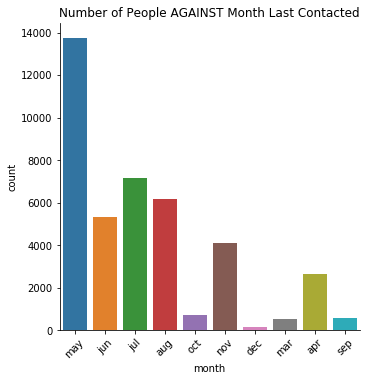

In [29]:
#Visualise "month" and "loan"
sns.catplot(x="month", data=bankdata, kind="count")
plt.title("Number of People AGAINST Month Last Contacted")
plt.xticks(rotation=45)
plt.show()

#The countplot below shows the number of those contacted in previous months.
#It can be seen that the largest number of people were contacted in the month of May - almost 1400 people were contacted.
#Obviously, campaign activity has steadily decreased over the months.

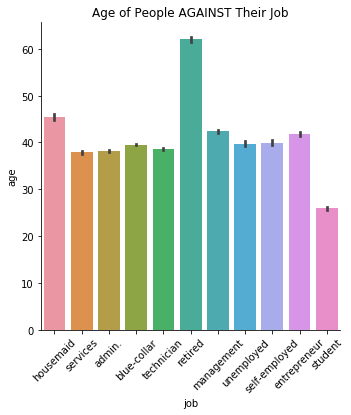

In [30]:
#Visualise "job" and "age"
sns.catplot(x="job", y="age", data=bankdata, kind="bar")
plt.title("Age of People AGAINST Their Job")
plt.xticks(rotation=45)
plt.show()

#It can be established from the barchart below that people retire often at the age of 60,
#and that people with admin job are in their late 30s.

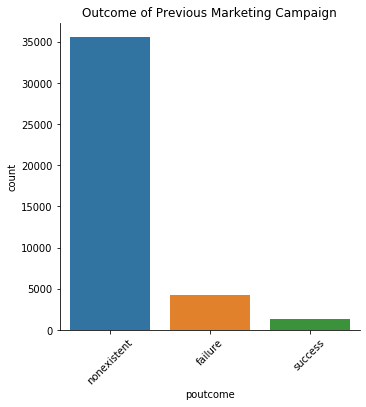

In [31]:
#Visualise the frequency of the outcomes of the previous campaign
sns.catplot(x="poutcome", data=bankdata, kind="count")
plt.title("Outcome of Previous Marketing Campaign")
plt.xticks(rotation=45)
plt.show()

#It can be seen that there is little success achieved from the previous campaign.
#This is partly because campaign activity steadily decreased over the months.

<h2>Data Encoding</h2>

In [32]:
#rename column names from month, day-of-week, poutcome, and target to month_name, day-of-week_name,
#poutcome_name, and  target_name respectively<

bankdata_df.rename(columns={"month":"month_name", "day_of_week":"day_of_week_name", "poutcome":"poutcome_name", "y":"target_name"}, inplace=True)

In [33]:
#encode and delete the original columns
bankdata_encoded = pd.get_dummies(bankdata_df, columns=["job", "marital", "education", "default", "housing", "loan", "contact"], sparse=True, drop_first=True)

<h4>Encode And Store In New Columns With New Names</h4>

In [34]:
bankdata_encoded["month"] = bankdata_encoded["month_name"].map({"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov": 11, "dec":12})

In [35]:
bankdata_encoded["day_of_week"] = bankdata_encoded["day_of_week_name"].map({"mon":1, "tue":2, "wed":3, "thu":4, "fri":5, "sat":6, "sun":7})

In [36]:
bankdata_encoded["poutcome"] = bankdata_encoded["poutcome_name"].map({"nonexistent":1, "failure":2, "success":3})

In [37]:
bankdata_encoded["target"] = bankdata_encoded["target_name"].map({"yes":1, "no":0})

<h4>Inspect The Column Names</h4>

In [38]:
bankdata_encoded.columns

Index(['age', 'month_name', 'day_of_week_name', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome_name', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target_name',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_divorced', 'education_high.school', 'education_illiterate',
       'education_married', 'education_professional.course',
       'education_single', 'education_university.degree', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_telephone', 'month', 'day_of_week',
       'poutcome', 'target'],
      dtype='object')

<h4>Inspect The Datatypes Of All The Data</h4>

In [39]:
bankdata_encoded.dtypes

age                                         int64
month_name                                 object
day_of_week_name                           object
duration                                    int64
campaign                                    int64
pdays                                       int64
previous                                    int64
poutcome_name                              object
emp.var.rate                              float64
cons.price.idx                            float64
cons.conf.idx                             float64
euribor3m                                 float64
nr.employed                               float64
target_name                                object
job_blue-collar                  Sparse[uint8, 0]
job_entrepreneur                 Sparse[uint8, 0]
job_housemaid                    Sparse[uint8, 0]
job_management                   Sparse[uint8, 0]
job_retired                      Sparse[uint8, 0]
job_self-employed                Sparse[uint8, 0]


<h2>Build Model</h2>

<h4>Select The Feature And The Target Variables</h4>

In [40]:
X = bankdata_encoded.drop(["month_name", "day_of_week_name", "poutcome_name", "target_name", "duration", "target"], axis=1)
y = bankdata_encoded["target"]

<h4>Linear Regression And Random Forest Classifier Model Function</h4>

In [41]:
def Model(X, y, model):
    try:
        #split the data
        X_train_validation, X_test, y_train_validation, y_test = train_test_split(X, y, random_state=0)
        X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, random_state=0)
        #scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_validation_scaled = scaler.transform(X_validation)
        X_test_scaled = scaler.transform(X_test)
        if model == 1:
            #train the Random Forest model
            reg = RandomForestClassifier(random_state=0)
            reg.fit(X_train_scaled, y_train)
            print("Random Forest Classifier DONE...")
        elif model == 2:
            #build the Logistic Regression model
            reg = LogisticRegression()
            reg.fit(X_train_scaled, y_train)
            print("Logistic Regression DONE...")
        else:
            print("Invalid input")
        return X_train_scaled, X_validation_scaled, X_test_scaled, y_train, y_validation, y_test, reg
    except:
        pass

<h4>Parameter Tuning Function</h4>

In [42]:
def Parametertuning(X_train_scaled, X_validation_scaled, y_train, y_validation, model):
    try:
        train_accuracy = []
        validation_accuracy = []
        #hyper-parameter tuning and get the best value of regularization constant c in order to avoid overfitting
        if model == 1:
            #hyper-parameter tune and get the best value of the number of trees in the forest in order to avoid overfitting
            no_of_trees = [1, 2, 5, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
            for tree in no_of_trees:
                reg = RandomForestClassifier(n_estimators=tree, random_state=0)
                reg.fit(X_train_scaled, y_train)
                train_accuracy.append(reg.score(X_train_scaled, y_train))
                validation_accuracy.append(reg.score(X_validation_scaled, y_validation))
            plt.plot(no_of_trees, train_accuracy, label = "Training Accuracy")
            plt.plot(no_of_trees, validation_accuracy, label = "Validation Accuracy")
            plt.legend()
            plt.xlabel("No. of Trees")
            plt.ylabel("Accuracies")
            plt.show()
        elif model == 2:
            values_of_C = [0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.6, 0.8]
            for c in values_of_C:
                reg = LogisticRegression(C = c)
                reg.fit(X_train_scaled, y_train)
                train_accuracy.append(reg.score(X_train_scaled, y_train))
                validation_accuracy.append(reg.score(X_validation_scaled, y_validation))
            plt.plot(values_of_C, train_accuracy, label = "Training Accuracy")
            plt.plot(values_of_C, validation_accuracy, label = "Validation Accuracy")
            plt.legend()
            plt.xlabel("Values of C")
            plt.ylabel("Accuracies")
            plt.show()
    except:
        pass

<h4>Retrain Function</h4>

In [43]:
def Retrain(X_train_scaled, y_train, k, model):
    try:
        #re-train the Logistic Regression model
        if model == 1:
            reg = RandomForestClassifier(n_estimators=k, random_state=0)
            reg.fit(X_train_scaled, y_train)
        #re-train the Random Forest model
        elif model == 2:
            reg = LogisticRegression(C=k)
            reg.fit(X_train_scaled, y_train)
        return reg
    except:
        pass

In [44]:
#call the model function and unpack it for Random Forest Classifier
reg_type=int(input("Enter 1 for Random Forest Classifier... Enter 2 for Logistic Regression: "))
X_train_scaled, X_validation_scaled, X_test_scaled, y_train, y_validation, y_test, reg = Model(X, y, reg_type)

Enter 1 for Random Forest Classifier... Enter 2 for Logistic Regression: 1
Random Forest Classifier DONE...


<h4>Predict And Evaluate Performance</h4>

In [45]:
#predict the output of the Validation dataset
y_pred1 = reg.predict(X_validation_scaled)
print(bankdata_encoded["target_name"][y_pred1].values)
print(bankdata_encoded["target_name"][y_pred1].value_counts())

['no' 'no' 'no' ... 'no' 'no' 'no']
no    7723
Name: target_name, dtype: int64


In [46]:
#check the performance of the model on the training and validation dataset
print(f"Train Accuracy: \t{reg.score(X_train_scaled, y_train)*100:.4}%")
print(f"Validation Accuracy: \t{reg.score(X_validation_scaled, y_validation)*100:.4}%")

Train Accuracy: 	99.54%
Validation Accuracy: 	89.71%


<h4>Tune The Parameters And Retrain The Model</h4>

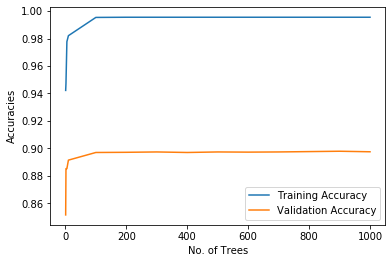

In [47]:
Parametertuning(X_train_scaled, X_validation_scaled, y_train, y_validation, reg_type)

In [48]:
tree = int(input("Enter a good approximate number of trees: "))
reg_new = Retrain(X_train_scaled, y_train, tree, reg_type)

Enter a good approximate number of trees: 2


In [49]:
#check the performance of the new model
print(f"Modified Train Accuracy: \t{reg_new.score(X_train_scaled, y_train)*100:.4}%")
print(f"Modified Validation Accuracy: \t{reg_new.score(X_validation_scaled, y_validation)*100:.4}%")
print(f"Modified Test Accuracy: \t{reg_new.score(X_test_scaled, y_test)*100:.4}%")

Modified Train Accuracy: 	94.73%
Modified Validation Accuracy: 	88.53%
Modified Test Accuracy: 	88.27%


In [50]:
#the worse performance of random forest model on the dataset is because the features contains many sparse data

In [51]:
#call the model function and unpack it for Logistic Regression
reg_type=float(input("Enter 1 for Random Forest Classifier... Enter 2 for Logistic Regression: "))
X_train_scaled, X_validation_scaled, X_test_scaled, y_train, y_validation, y_test, reg = Model(X, y,reg_type)

Enter 1 for Random Forest Classifier... Enter 2 for Logistic Regression: 2
Logistic Regression DONE...


<h4>Predict And Evaluate Performance</h4>

In [52]:
#predict the output of the Validation dataset
y_pred1 = reg.predict(X_validation_scaled)
print(bankdata_encoded["target_name"][y_pred1].values)
print(bankdata_encoded["target_name"][y_pred1].value_counts())

['no' 'no' 'no' ... 'no' 'no' 'no']
no    7723
Name: target_name, dtype: int64


In [53]:
#check the performance of the model on the training and validation dataset
print(f"Train Accuracy: \t{reg.score(X_train_scaled, y_train)*100:.4}%")
print(f"Validation Accuracy: \t{reg.score(X_validation_scaled, y_validation)*100:.4}%")

Train Accuracy: 	90.08%
Validation Accuracy: 	90.17%


<h4>Tune The Parameters And Retrain The Model</h4>

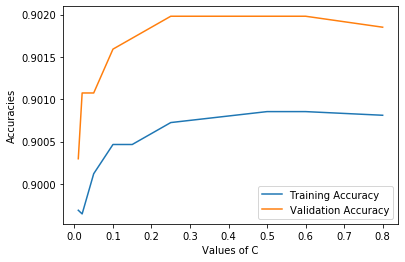

In [54]:
Parametertuning(X_train_scaled, X_validation_scaled, y_train, y_validation, reg_type)

In [55]:
c = float(input("Enter a good approximate regularisation constant c: "))
reg_new = Retrain(X_train_scaled, y_train, c, reg_type)

Enter a good approximate regularisation constant c: 0.000001


In [56]:
#check the performance of the new model
print(f"Modified Train Accuracy: \t{reg_new.score(X_train_scaled, y_train)*100:.4}%")
print(f"Modified Validation Accuracy: \t{reg_new.score(X_validation_scaled, y_validation)*100:.4}%")
print(f"Modified Test Accuracy: \t{reg_new.score(X_test_scaled, y_test)*100:.4}%")

Modified Train Accuracy: 	88.69%
Modified Validation Accuracy: 	88.84%
Modified Test Accuracy: 	88.75%
